In [549]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
  import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
  summarize,
  poly)

movies = pd.read_csv("imdb_top_1000.csv")
movies

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [413]:
movies.mean()

/var/folders/_l/4l0tlm8d2812gt5rf77kpy8c0000gp/T/ipykernel_17915/1859825645.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.mean()


IMDB_Rating         7.94930
Meta_score         77.97153
No_of_Votes    273692.91100
dtype: float64

In [454]:
pip install ISLP;

Note: you may need to restart the kernel to use updated packages.


In [455]:
#Mean aof the IMDB_rating is 7.9430
#Meta_score is about 77.97
#No_of_Votes mean is 276392.91
#Runtime is about 122 minutes

In [456]:
movies['Runtime'] = movies['Runtime'].str.replace('min', '').str.strip()
movies



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [457]:
#CORRELATIONS
movies["Runtime"].mean()

inf

In [458]:
#Correlation between Runtime and IMDB_Rating
movies['Runtime'] = pd.to_numeric(movies['Runtime'])
correlation1 = movies['Runtime'].corr(movies['IMDB_Rating'])
print(correlation1)

#Correlation between Runtime and Meta_score
correlation2 = movies['Runtime'].corr(movies['Meta_score'])
print(correlation2)

#Correlation between IMDB Rating and Meta_score
correlation3 = movies['IMDB_Rating'].corr(movies['Meta_score'])
print(correlation3)

#Correlation between Gross and IMDB_Rating
movies['Gross'] = movies['Gross'].str.replace(',', '').astype(float)
correlation4 = movies['Gross'].corr(movies['IMDB_Rating'])
print(correlation4)

#Correlation between No_of_votes and IMDB_rating
correlation5 = movies['No_of_Votes'].corr(movies['IMDB_Rating'])
print(correlation5)


0.24309589775419405
-0.03145197188503086
0.2685308445595545
0.0959227711013238
0.4949788358621426


In [459]:
#NORMALIZE DATA AND PRODUCE GRAPHS
Runtime_max = max(movies['Runtime'])
Runtime_min = min(movies['Runtime'])
Runtime = (movies['Runtime'] - Runtime_min)/(Runtime_max - Runtime_min)
Runtime





0      0.351449
1      0.471014
2      0.387681
3      0.568841
4      0.184783
         ...   
995    0.253623
996    0.565217
997    0.264493
998    0.188406
999    0.148551
Name: Runtime, Length: 1000, dtype: float64

In [460]:
Meta_score_max = max(movies['Meta_score'])
Meta_score_min = min(movies['Meta_score'])
normalized_Meta_score = (movies['Meta_score'] - Meta_score_min)/(Meta_score_max - Meta_score_min)
normalized_Meta_score

0      0.722222
1      1.000000
2      0.777778
3      0.861111
4      0.944444
         ...   
995    0.666667
996    0.777778
997    0.791667
998    0.694444
999    0.902778
Name: Meta_score, Length: 1000, dtype: float64

In [461]:
IMDB_Rating_max = max(movies['IMDB_Rating'])
IMDB_Rating_min = min(movies['IMDB_Rating'])
IMDB_Rating = (movies['IMDB_Rating'] - IMDB_Rating_min)/(IMDB_Rating_max - IMDB_Rating_min)
IMDB_Rating

0      1.000000
1      0.941176
2      0.823529
3      0.823529
4      0.823529
         ...   
995    0.000000
996    0.000000
997    0.000000
998    0.000000
999    0.000000
Name: IMDB_Rating, Length: 1000, dtype: float64

Text(0.5, 1.0, 'Scatter Plot of Meta score and Runtime')

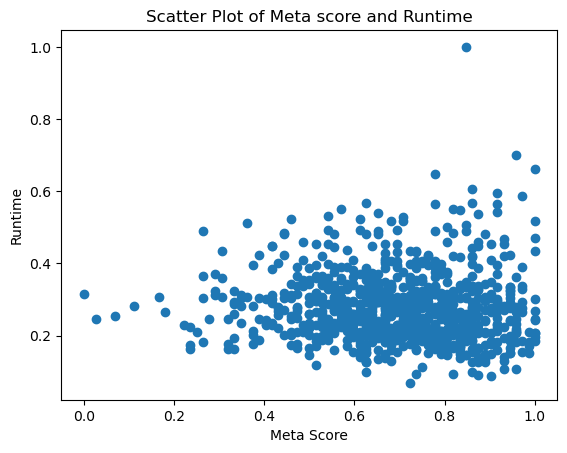

In [462]:
import matplotlib.pyplot as plt
plt.scatter(normalized_Meta_score, Runtime)
plt.xlabel('Meta Score')
plt.ylabel('Runtime')
plt.title('Scatter Plot of Meta score and Runtime')

Text(0.5, 1.0, 'Scatter Plot of IMDB Rating and Runtime')

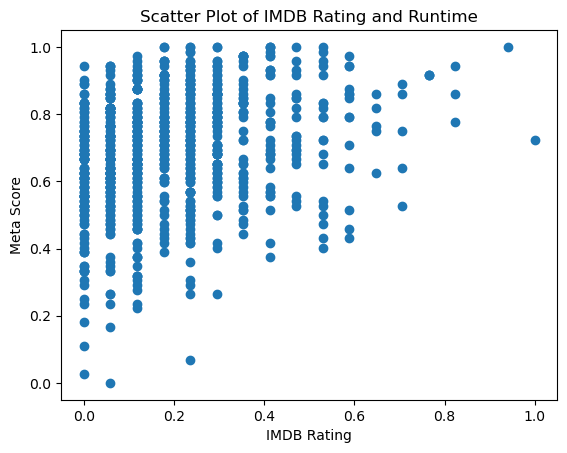

In [463]:
plt.scatter(IMDB_Rating, normalized_Meta_score)
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('Scatter Plot of IMDB Rating and Runtime')

In [464]:
movies[['Runtime','Meta_score']].describe()

,Runtime,Meta_score
count,1000.000000,843.000000
mean,122.891000,77.971530
std,28.093671,12.376099
min,45.000000,28.000000
25%,103.000000,70.000000
50%,119.000000,79.000000
75%,137.000000,87.000000
max,321.000000,100.000000


In [465]:
movies.describe()


,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [522]:

movies_cleaned = movies.dropna(subset=['Meta_score','No_of_Votes'])

#X is predictor variable
X = pd.DataFrame({'intercept': np.ones(movies_cleaned.shape[0]),
                  'No_of_Votes': movies_cleaned['No_of_Votes']})

# y is label vector 
y = movies_cleaned["Meta_score"]

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Meta_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2881
Date:                Tue, 23 Apr 2024   Prob (F-statistic):              0.592
Time:                        18:19:06   Log-Likelihood:                -3316.3
No. Observations:                 843   AIC:                             6637.
Df Residuals:                     841   BIC:                             6646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      78.1814      0.579    135.136      0.000      77.046      79.317
No_of_Votes -6.701e-07   1.25e-06     -0.537      0.592   -3.12e-06    1.78e-06
==============================================================================
Omnibus:                       50.420   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.264
Skew:                          -0.608   Prob(JB):                     2.23e-13
Kurtosis:                       3.425   Cond. No.                     6.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

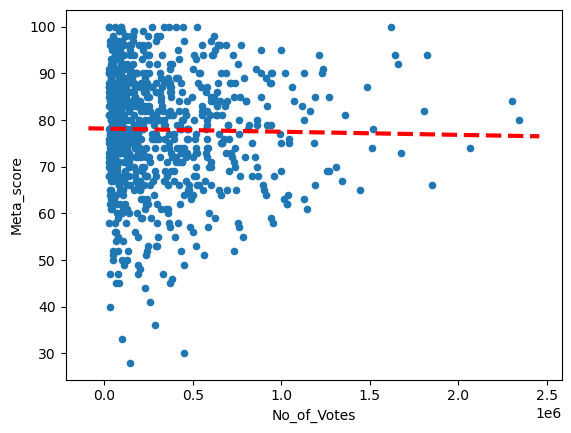

In [530]:
def abline(ax, b, m):
  "Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim)
    
def abline(ax, b, m, *args, **kwargs):
  "Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim, *args, **kwargs)
    
ax = movies.plot.scatter('No_of_Votes', 'Meta_score')
abline(ax,
  results.params[0],
  results.params[1],
  'r--',
  linewidth=3)

plt.plot('No_of_', mymodel(myline))



Text(0.5, 1.0, 'Linear Regression model that uses IMDB_Rating as predictor')

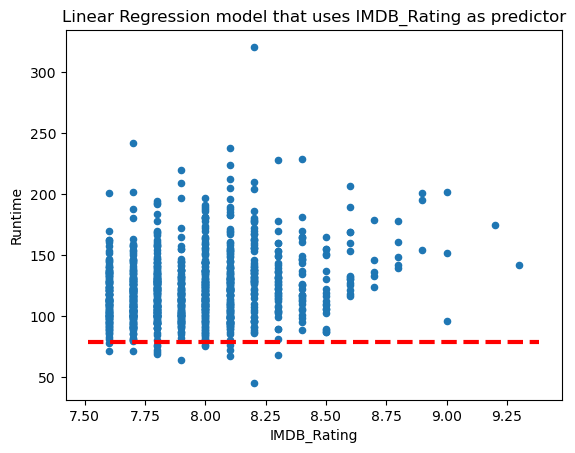

In [546]:
ax = movies.plot.scatter('IMDB_Rating', 'Runtime')
abline(ax,
  results.params[0],
  results.params[1],
  'r--',
  linewidth=3)
plt.title("Linear Regression model that uses IMDB_Rating as predictor")
